IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Tarea 01 – Cargando y Analizando Datos

- **Fecha de Entrega:** martes 26 de agosto de 2025, a las 23:59.
- 
**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en l emódulo de Tara 01 habilitado en Canvas.




## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tara.

- Deben hacer sus consultas y comentarios sobre la Tarea a traves del canal de Tareas en eo del curso en Canvas.os.
cteriza.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Para esta tarea, tendremos como objetivo comprender cómo han cambiado los juegos de mesa en los últimos 40 años. Específicamente queremos saber qué tipos de juegos se han vuelto más comunes hoy en día y qué los caracteriza.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

## 2. Datos

Estaremos utilizando información extraída desde [BoardGameGeek.com](https://boardgamegeek.com/), una plataforma para aficionados de los juegos de mesa, que permite a sus usuarios registrar, calificar e intercambiar sus juegos favoritos. Actualmente, BGG es una de las bases de datos más extensa y diversa de juegos de mesa.

El dataset con el que trabajaremos consiste en un grupo de archivos CSV que contienen información sobre más de 100.000 juegos de mesa almacenados en la plataforma. Este puede descargarse directamente desde el siguiente enlace: https://www.kaggle.com/datasets/mshepherd/board-games Para descargar los datos, haga click en el botón de **Download**, donde podrá descargar los archivos como `.zip`, o bien utilizar la API de Kaggle.

Para el desarrollo de esta tarea, solo utilizaremos los archivos con el prefijo `bgg_`.

**Si utiliza la API de Kaggle para descargar los datos, deje el código utilizado en la siguiente celda:**

In [1]:
# Descarga de datos desde Kaggle

### 2.1 Librerías

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y Markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 DataFrame unificado (1 punto)

Vamos a cargar en un DataFrame los datos de juegos guardados en el documento `bgg_GameItem.csv`. Al inspeccionar nuestros datos, podemos notar que los valores de ciertas comunas vienen "codificados" con ID. Para comenzar, vamos a juntar la información de los distintos archivos descargados.

**a) (0.8 pts)** Genere un DataFrame único con toda la información de cada juego, incluyendo: nombres de artistas y diseñadores involucrados, mecánicas, categorías, tipo, familia y editorial. Guarde este DataFrame en un nuevo archivo CSV.

In [3]:
def dato(nombre_csv):
    return pd.read_csv(os.path.join("dataset board games", nombre_csv + ".csv"))

juego = dato("bgg_GameItem")
categorias = dato("bgg_Category")
familia = dato("bgg_GameFamily")
tipo = dato("bgg_GameType")
mecanicas = dato("bgg_Mechanic")
personas = dato("bgg_Person")
publisher = dato("bgg_Publisher")

df_completo = pd.concat([juego, categorias, familia, tipo, mecanicas, personas, publisher], axis=0)
df_completo.to_csv("dataset board games/dataset_completo.csv", index=True)

print(df_completo.columns)




Index(['bgg_id', 'name', 'year', 'game_type', 'designer', 'artist',
       'publisher', 'min_players', 'max_players', 'min_players_rec',
       'max_players_rec', 'min_players_best', 'max_players_best', 'min_age',
       'min_age_rec', 'min_time', 'max_time', 'category', 'mechanic',
       'cooperative', 'compilation', 'compilation_of', 'family',
       'implementation', 'integration', 'rank', 'num_votes', 'avg_rating',
       'stddev_rating', 'bayes_rating', 'complexity', 'language_dependency',
       'bga_id', 'dbpedia_id', 'luding_id', 'spielen_id', 'wikidata_id',
       'wikipedia_id'],
      dtype='object')


**b) (0.2 pts)** ¿Cuánto espacio en disco ocupa este DataFrame? ¿Cuánto espacio en disco ocupan los documentos CSV separados? ¿A qué se debe esta diferencia? Comente.



los archivos por separado pesan 40.1 mb mientras que el archivo combinado pesa  22.4 mb la razon de esto es puesto que
al unirse los datos los archivos que tienen datos repetidos se eliminan y solo se quedan con una sola copia de esos datos
ademas que al unirlo los archivos que comparten se mantienen haciendo un uso mas eficiente del espacio

### 3.2 Juegos publicados anualmente (1.5 puntos)


**a) (0.5 pts)** Limpie los datos para dejar solo aquellos que tienen valores válidos de año de publicación. Luego responda: ¿cuál es el rango de años con el que estamos trabajando? ¿Tienen sentido estos años?


In [4]:
#respuesta inspirada en la respuesta dada de gemini

df_2 = df_completo.copy()
df_2.dropna(subset = ["year"], inplace = True)


df_2["year"] = pd.to_numeric(df_2["year"], errors='coerce')
df_2["year"] = df_2["year"].astype(int)



min = df_2["year"].min()
max = df_2["year"].max()

print(min ,  max)



-3500 2026


el rango con el que estamos trabajando es [-3500 - 2026] es decir , estamos trabajando con un conjunto de datos de 5526 años en total

los datos tienen parcialmente sentido, lo que no posee total sentido es el año 2026, sin embargo, puede ser un representante de juegos de mesa que estaran disponibles en el siguiente año, o una columna hecha en preparacion de la misma

In [5]:
print(df_2["year"].nlargest(10))

87637     2026
99711     2026
84728     2025
95304     2025
95686     2025
96943     2025
98208     2025
98528     2025
105594    2025
107793    2025
Name: year, dtype: int64


de esta forma, se confirma que, en efecto, los datos mostrados son por juegos de mesa que existen en el dataset y pueden o no ser lanzados el siguiente año

**b) (0.5 pts)** Seleccione solamente los juegos entre los años 1980 y 2025. Luego grafique la cantidad de juegos publicados por año. ¿Cómo es esta tendencia? Comente.

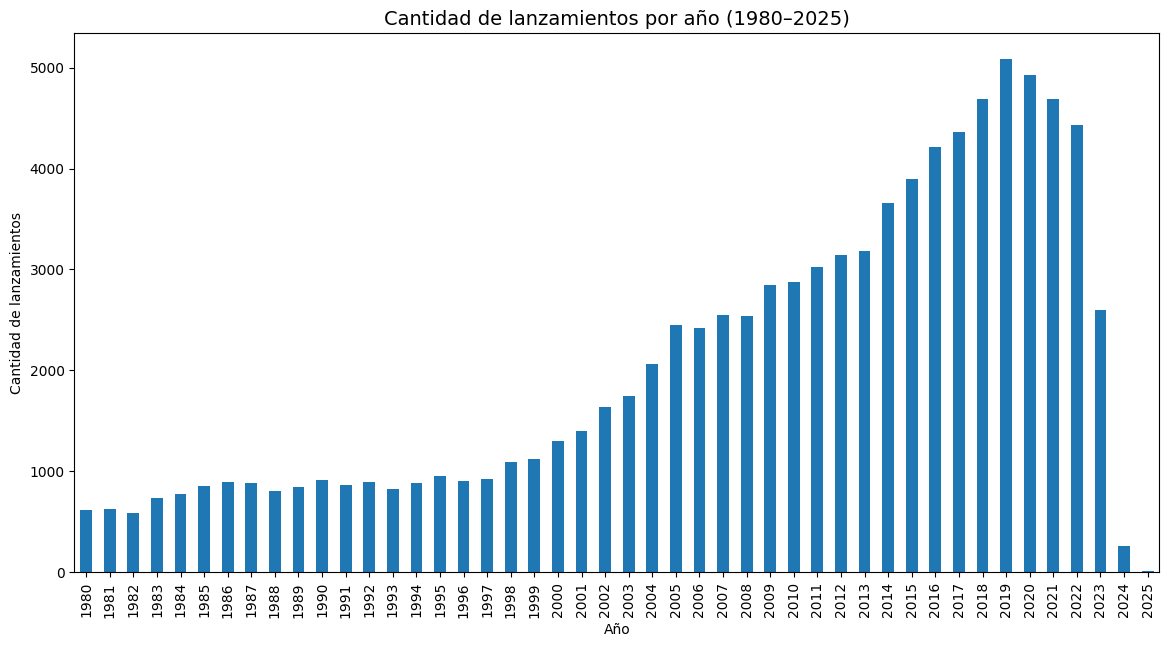

In [6]:

datos_trabajo_actual = df_2[(df_2["year"] >= 1980) & (df_2["year"] <= 2025)]

conteo_años = datos_trabajo_actual.groupby("year").size()

conteo_años.plot(kind="bar", figsize=(14,7))
plt.title("Cantidad de lanzamientos por año (1980–2025)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Cantidad de lanzamientos")
plt.show()

la tendencia es a la alta teniendo su pico en el año 2019, posterior a esto se ve como tiende a la baja , razon que puede tener varias explicaciones , la que personalmente yo daria es que esto es responsabilidad  de la pandemia de covid que afecto en como los niños juegan el año 2020 ademas del incremento del uso de la tecnologia en los menores

**c) (0.5 pts)** ¿Entre qué años hubo un mayor aumento de publicación de juegos de mesa según los registros de BGG?

se puede observar que a partir del año 1997 se nota una tendencia bien importante a la alta que se detiene en el año 2019, significando que desde estos años se tiene un aumento, sin embargo, si se pregunta por el rango de años donde se publicaron mas juegos de mesa , estos serian 2017 a 2022

### 3.3 Análisis de duración y complejidad (1.5 puntos)

Si bien hay muchas posibles características que podemos explorar para los juegos de mesa, esta vez nos centraremos en el tiempo de juego y la complejidad. En esta sección queremos comprender si se ha modificado notablemente la duración promedio y la percepción de complejidad de los juegos de mesa a través de los años.

**a) (0.3 pts)** Inspecciones y filtre los datos que tengan valores válidos para: tiempo mínimo de juego, tiempo máximo de juego y complejidad. En el caso de que existan "outliers", puede descartarlos, cosiderando un rango razonable para las variables anteriores. Justifique su desición.

In [8]:
datos_tiempo_de_juego = df_2[["min_time","max_time","complexity"]]

print(datos_tiempo_de_juego.head())

   min_time  max_time  complexity
0     240.0     240.0      4.3144
1      30.0      30.0      1.9636
2      30.0      60.0      2.4784
3      60.0      60.0      2.6667
4      90.0      90.0      2.4985


se tomaron estos datos por el mismo nombre que poseen, se asume que tanto min/max time se refieren a tiempo de juego y complexity como una representacion numericas de la dificultad del juego

**b) (0.2 pts)** Veremos ahora si ha cambiado la duración promedio de los juegos de mesa en nuestro rango de años seleccionado. Primero, cree una nueva columna `avg_time` en el dataset con la duración promedio supuesta para cada juego.

In [9]:
df_2["avg_time"] = ((datos_tiempo_de_juego["min_time"] + datos_tiempo_de_juego["max_time"]) / 2)

print(df_2["avg_time"].head())

0    240.0
1     30.0
2     45.0
3     60.0
4     90.0
Name: avg_time, dtype: float64


**c) (0.5 pts)** Grafique la duración promedio de juegos al año entre 1980 y 2025. ¿Existe alguna tendencia? Asegúrese de colocar las unidades correspondientes en sus ejes si es necesario. Comente sus resultados.

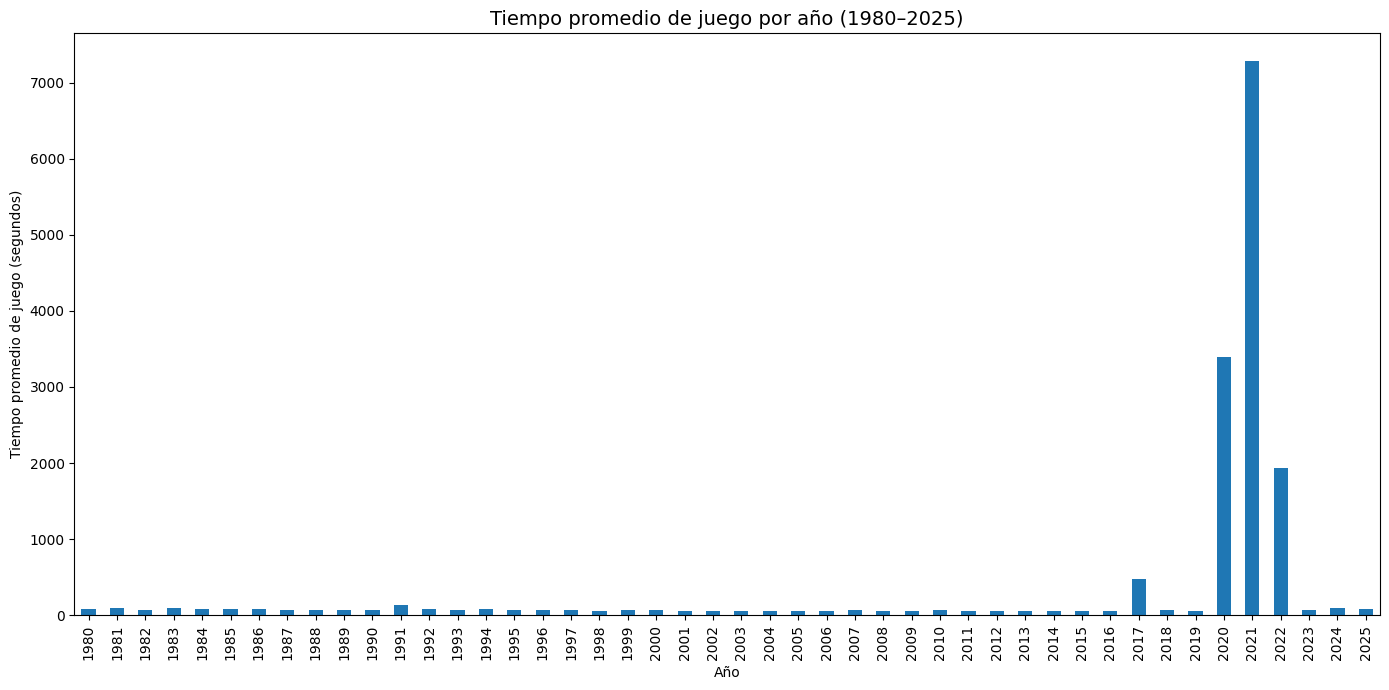

In [ ]:
#grafico copiado del anterior, del apartado 3.2 b
datos_trabajo_actual = df_2[(df_2["year"] >= 1980) & (df_2["year"] <= 2025)]
avg_time_por_año = datos_trabajo_actual.groupby("year")['avg_time'].mean()

avg_time_por_año.plot(kind="bar", figsize=(14,7))

plt.title("Tiempo promedio de juego por año (1980–2025)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Tiempo promedio de juego (segundos)")
plt.xticks(rotation=90)
plt.tight_layout()    
plt.show()

se nota como se jugaron mas juego de mesa en los años 2017 y entre los años 2020 a 2022, esto puede ser debido al covid y el hecho de estar todos confinados en casa

**d) (0.5 pts)** Nos interesa saber si los juegos de mesa recientes son más complejos que aquellos publicados antes de los 2000. BoardGameGeek permite evaluar la complejidad (o "weight") de un juego en una escala de 1 a 5, siendo 1 un juego "liviano" o fácil de entender, y 5 un juego "pesado" o complejo. Primero, seleccione los juegos que han sido evaluados por al menos 100 usuarios. Luego grafique la complejidad promedio de los juegos según año. Responda: ¿ha cambiado la percepción de complejidad entre juegos entre 1980 y la actualidad?

### 3.4 Análisis de categorías comunes (2 puntos)

Existe una gran diversidad de categorías de juegos de mesa. Ahora nos concentraremos en un grupo específico de ellas, con el fin de analizar cómo a cambiado la cantidad de juegos de estas clases desde 1980 hasta hoy.

**a) (0.7 pts)** ¿Cuáles son las 5 categorías más comunes en los juegos del dataset? Muestre la cantidad de juegos que hay de cada una. Puede graficar estos valores, o bien, entregar un DataFrame con sus valores.

**b) (0.3 pts)** Para cada una de estas 5 categorías, cree un DataFrame que contenga la cantidad de juegos en el dataset según año. Luego junte estos DataFrames en uno solo con los atributos de "Año", "Categoría" y "Cantidad".

**c) (1 pto)** Grafique, en un solo gráfico y con distintos colores, la cantidad de juegos por año según categoría. Preocúpese de ponerle etiquetas al gráfico para identificar cada categoría y una leyenda donde se muestre cada una. Comente: ¿ha habido un cambio entre los juegos más comunes en los años 80 y hoy?


### 3.5 Análisis Crítico (Bono +0.5 puntos)

¿Qué limitaciones o problemas encontraste en los datos?

Uso de Ia en la tarea

La tarea se hizo junto con la ayuda de github copilot, con el agente 03-mini , usando para escribir el codigo 
a medida que se fue escribiendo,tambien se uso gemini 2.5 pro para pedir ayuda en ciertas partes del codigo,

ademas se leyo parte de la documentacion de pandas para entender mejor lo que se esta haciendo

en el apartado 3.2 se le hizo la siguiente pregunta a gemini 

"tengo un dataframe que en una de sus columnas posee "year" dime un codigo de como filtrarlo tanto si los datos esten en str como en int, que el codigo que des sea sin comentarios"

aqui esta la respuesta que dio:
"""Claro, aquí tienes el código para filtrar un DataFrame de Pandas por la columna "year", tanto si los datos son de tipo int como str.

Filtrar si 'year' es de tipo numérico (int)
Si la columna 'year' ya es de tipo numérico, puedes aplicar el filtro directamente.

Python

import pandas as pd

data_numeric = {'year': [2018, 2019, 2020, 2021, 2022],
                'sales': [100, 150, 200, 250, 300]}
df_numeric = pd.DataFrame(data_numeric)

print("DataFrame Original (year como int):")
print(df_numeric)
print("\nTipo de dato de la columna 'year':", df_numeric['year'].dtype)

filtered_df_numeric = df_numeric[df_numeric['year'] > 2020]

print("\nDataFrame filtrado (años mayores a 2020):")
print(filtered_df_numeric)
Salida de código
DataFrame Original (year como int):
   year  sales
0  2018    100
1  2019    150
2  2020    200
3  2021    250
4  2022    300

Tipo de dato de la columna 'year': int64

DataFrame filtrado (años mayores a 2020):
   year  sales
3  2021    250
4  2022    300

Filtrar si 'year' es de tipo texto (str)
Si la columna 'year' es de tipo string (object en Pandas), primero debes convertirla a un tipo numérico antes de poder aplicar un filtro de comparación.

Python

import pandas as pd

data_str = {'year': ['2018', '2019', '2020', '2021', '2022'],
            'sales': [100, 150, 200, 250, 300]}
df_str = pd.DataFrame(data_str)

print("DataFrame Original (year como str):")
print(df_str)
print("\nTipo de dato de la columna 'year':", df_str['year'].dtype)

df_str['year'] = pd.to_numeric(df_str['year'])
filtered_df_str = df_str[df_str['year'] > 2020]

print("\nDataFrame filtrado (años mayores a 2020):")
print(filtered_df_str)
Salida de código
DataFrame Original (year como str):
   year  sales
0  2018    100
1  2019    150
2  2020    200
3  2021    250
4  2022    300

Tipo de dato de la columna 'year': object

DataFrame filtrado (años mayores a 2020):
   year  sales
3  2021    250
4  2022    300
"""



en el apartado b , tambien a gemini se le pidio
"perfecto, ahora como puedo seleccionar datos entre un rango usando una columna de dataframes?? se consiso y enfocate en enseñarme para no tener que volvertelo a pedir"

su respuesta fue "¡Claro! Para seleccionar datos dentro de un rango en una columna de un DataFrame, tienes dos métodos principales y muy efectivos. Te enseñaré ambos para que elijas el que más te guste y entiendas el concepto de fondo.

Usemos este DataFrame de ejemplo para los casos:

Python

import pandas as pd

data = {'Estudiante': ['Ana', 'Luis', 'Carla', 'Pedro', 'Sofía', 'Juan', 'Marta'],
        'Calificacion': [95, 78, 85, 65, 72, 91, 88]}
df = pd.DataFrame(data)
Método 1: Indexación Booleana (El más flexible) 🧠
Este es el método más común y poderoso porque se basa en crear "máscaras" de condiciones lógicas (True/False). La idea es pedirle a pandas que te devuelva solo las filas donde tu condición sea True.

La sintaxis es: df[(df['columna'] >= valor_minimo) & (df['columna'] <= valor_maximo)]

Desglose:

df['Calificacion'] >= 70 crea una serie de True y False. Será True donde la calificación sea 70 o más.

df['Calificacion'] <= 90 hace lo mismo para el límite superior.

El símbolo & (Y lógico) combina ambas condiciones. Solo las filas que son True en ambas series se mantendrán.

¡Importante! Cada condición debe ir entre paréntesis () debido a la forma en que Python y pandas evalúan las operaciones.

Ejemplo: Seleccionar estudiantes con calificación entre 70 y 90.

Python

# Definimos el rango de calificaciones que nos interesa
rango_calificaciones = df[(df['Calificacion'] >= 70) & (df['Calificacion'] <= 90)]

print(rango_calificaciones)
Resultado:

  Estudiante  Calificacion
1       Luis            78
2      Carla            85
4      Sofía            72
6      Marta            88
Método 2: Usando .between() (El más directo y legible) 👌
Pandas tiene un método específico para rangos que hace el código un poco más limpio y fácil de leer.

La sintaxis es: df[df['columna'].between(valor_minimo, valor_maximo)]

Este método hace exactamente lo mismo que el anterior, pero en una sola función. Por defecto, incluye ambos extremos del rango (valor_minimo y valor_maximo).

Ejemplo: Mismo objetivo, seleccionar estudiantes con calificación entre 70 y 90.

Python

# Usando el método .between() para mayor claridad
rango_con_between = df[df['Calificacion'].between(70, 90)]

print(rango_con_between)
El resultado es idéntico al del método anterior.

Resumen Clave para que no lo Olvides
Para máxima flexibilidad (por si luego quieres combinar con otras condiciones usando | para "O"), usa la indexación booleana: df[(condicion1) & (condicion2)].

Recuerda siempre los paréntesis ( ) alrededor de cada condición cuando usas & (Y) o | (O). Es el error más común.

Para seleccionar un rango numérico de forma limpia y directa, usa .between(): df[df['columna'].between(min, max)]. Es más difícil equivocarse"


pregunta hecha a chatgpt 5 para la seccion 3.2 b
"tengo un dataset, llamado datos_trabajo_actual , necesito graficarlo año por año, en el rgo 1980 2025 , y tengo los datos filtrado en year de la forma (datos_trabajo_actual = df_2[(df_2["year"] >= 1980) & (df_2["year"] <= 2025)]) dame el codigo que lo grafique en la cantidad de años lanzados por año, esto seria de la forma df_2[publisher]"

respuesta 
"Perfecto, entiendo 😄.
Quieres un gráfico que muestre **la cantidad de lanzamientos por año** (en tu dataset `datos_trabajo_actual`), agrupando por la columna `"year"` y contando cuántos hay, posiblemente separados por `"publisher"`.

Te paso un ejemplo de código en **pandas + matplotlib**:

```python
import matplotlib.pyplot as plt

# Agrupamos por año y contamos cuántos registros hay por publisher
lanzamientos_por_año = datos_trabajo_actual.groupby(["year", "publisher"]).size().reset_index(name="count")

# Pivot para graficar más fácil (años en filas, publishers en columnas)
tabla_pivot = lanzamientos_por_año.pivot(index="year", columns="publisher", values="count").fillna(0)

# Graficamos
tabla_pivot.plot(kind="bar", stacked=True, figsize=(14,7))

plt.title("Cantidad de lanzamientos por año (1980–2025)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Cantidad de lanzamientos")
plt.legend(title="Publisher", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
```

🔎 Explicación:

* `groupby(["year", "publisher"]).size()` → cuenta cuántos registros hay por cada año y publisher.
* `.pivot(...)` → reorganiza para que cada **publisher** sea una columna y cada **año** una fila.
* `plot(kind="bar", stacked=True)` → muestra un gráfico de barras apiladas, para ver cuántos lanzamientos por año y qué proporción corresponde a cada publisher.

👉 Si quieres **solo la cantidad total por año** (sin separar por publisher), puedes simplificar:

```python
conteo_años = datos_trabajo_actual.groupby("year").size()

conteo_años.plot(kind="bar", figsize=(14,7))
plt.title("Cantidad de lanzamientos por año (1980–2025)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Cantidad de lanzamientos")
plt.show()
```

¿Quieres que el gráfico principal te lo haga **separado por publisher** (colores distintos) o prefieres solo el total por año 📊?
"